In [1]:
import pickle as pkl
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import copulagp.bvcopula as bvcopula
from copulagp.vine import CVine

i=1
with open(f'../../trained_models/pYgX_trained.pkl',"rb") as f:
    trained = pkl.load(f)

device = 'cuda:0'

# Figure 5G

In [2]:
# calculate H(y,v|x)

N_points = 200
inputs = torch.linspace(0,1,N_points,device=device).float()

Hs = []

for reps in tqdm(range(10)):
    %time vine = CVine.sample_from_GP(trained['models'],inputs)
    sem_tol = 0.1
    %time H20 = vine.entropy(sem_tol=sem_tol,mc_size=2000,v=True).cpu().numpy()

    Hs.append([H20])

CPU times: user 29.5 s, sys: 39.6 ms, total: 29.6 s
Wall time: 32.7 s
tensor(1.9402, device='cuda:0')
tensor(1.3625, device='cuda:0')
tensor(1.0893, device='cuda:0')
CPU times: user 5min 34s, sys: 1.52 s, total: 5min 35s
Wall time: 5min 8s
CPU times: user 32.3 s, sys: 505 ms, total: 32.8 s
Wall time: 36.8 s
tensor(1.9917, device='cuda:0')
tensor(1.4238, device='cuda:0')
tensor(1.1565, device='cuda:0')
tensor(1.0065, device='cuda:0')
CPU times: user 6min 24s, sys: 1.22 s, total: 6min 25s
Wall time: 5min 56s
CPU times: user 29.5 s, sys: 239 ms, total: 29.8 s
Wall time: 30.7 s
tensor(1.8890, device='cuda:0')
tensor(1.3270, device='cuda:0')
tensor(1.0889, device='cuda:0')
CPU times: user 5min 40s, sys: 1.06 s, total: 5min 42s
Wall time: 5min 18s
CPU times: user 30 s, sys: 207 ms, total: 30.3 s
Wall time: 31.6 s
tensor(1.9080, device='cuda:0')
tensor(1.3518, device='cuda:0')
tensor(1.0919, device='cuda:0')
CPU times: user 5min 39s, sys: 906 ms, total: 5min 39s
Wall time: 5min 15s
CPU times:

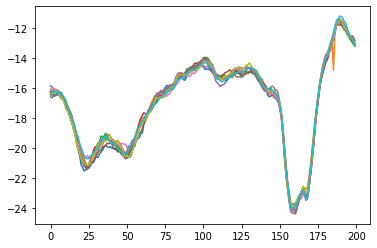

In [3]:
for h in Hs:
    plt.plot(h[0])

In [4]:
with open(f"../../plos_fig5_data/HYgX_109V_all.pkl","wb") as f:
    pkl.dump([20,inputs.cpu().numpy(),Hs],f)

# Figure 5H

In [2]:
Ns = [108,100,90,80,70,60,50,40,30,20,10,9,8,7,6,5,4,3,2]

In [ ]:
# calculate I(u^x,x) with CopulaGP 'integrated'
MIs = []

assert len(trained['models'][0])==108

for i in tqdm(Ns):
    layers = [trained['models'][j][:i-j] for j in range(min(i-1,len(trained['models'])))]
    
    MI = []
    for j in range(5): # sample from a GP a few times
        reshuffle = np.arange(len(trained['X']))
        np.random.shuffle(reshuffle)
        inputs = torch.tensor(trained['X'][reshuffle[:1000]],device=device).float() # then inputMI takes s_mc_size subsamples again 

        %time vine = CVine.sample_from_GP(layers,inputs)
        %time mi = vine.inputMI(sem_tol=0.1, s_mc_size=50, r_mc_size=10, sR_mc_size=1000, v=True)
        MI.append(mi)
        
    print(np.mean([ii[0].item() for ii in MI]))

    MIs.append([i,MI])
    
with open("../../plos_fig5_data/MI_CopulaGP_integrated.pkl","wb") as f:
    pkl.dump([Ns,MIs],f)

CPU times: user 32.9 s, sys: 38.2 ms, total: 32.9 s
Wall time: 1min 17s
Start calculating p(r) 0
Finished in 3 steps
18.0,15.4,2.6,                        10.3,8.29
Start calculating p(r) 1
Finished in 4 steps
17.2,14.8,2.41,                        6.67,5.73
Start calculating p(r) 2
Finished in 3 steps
17.4,15.0,2.36,                        5.32,4.66
Start calculating p(r) 3
Finished in 3 steps
17.1,14.7,2.42,                        4.6,3.93
Start calculating p(r) 4
Finished in 4 steps
17.1,14.7,2.41,                        4.11,3.51
Start calculating p(r) 5
Finished in 5 steps
17.2,14.8,2.41,                        3.79,3.23
Start calculating p(r) 6
Finished in 5 steps
17.2,14.8,2.46,                        3.57,2.99
Start calculating p(r) 7
Finished in 3 steps
17.3,14.8,2.46,                        3.33,2.82
Start calculating p(r) 8
Finished in 7 steps
17.2,14.7,2.46,                        3.14,2.65
Start calculating p(r) 9
Finished in 4 steps
17.3,14.8,2.44,                        

Start calculating p(r) 36
Finished in 3 steps
17.9,15.4,2.51,                        1.59,1.33
Start calculating p(r) 37
Finished in 4 steps
17.9,15.4,2.51,                        1.57,1.31
Start calculating p(r) 38
Finished in 4 steps
17.9,15.4,2.51,                        1.54,1.29
Start calculating p(r) 39
Finished in 2 steps
17.9,15.4,2.5,                        1.52,1.28
Start calculating p(r) 40
Finished in 3 steps
17.8,15.3,2.5,                        1.5,1.26
Start calculating p(r) 41
Finished in 2 steps
17.8,15.3,2.5,                        1.48,1.24
Start calculating p(r) 42
Finished in 4 steps
17.8,15.3,2.49,                        1.46,1.22
Start calculating p(r) 43
Finished in 4 steps
17.8,15.3,2.5,                        1.44,1.21
Start calculating p(r) 44
Finished in 3 steps
17.8,15.3,2.5,                        1.43,1.19
Start calculating p(r) 45
Finished in 3 steps
17.8,15.3,2.5,                        1.41,1.18
Start calculating p(r) 46
Finished in 2 steps
17.8,15.3,2

Finished in 3 steps
17.6,15.2,2.42,                        2.13,1.82
Start calculating p(r) 19
Finished in 4 steps
17.7,15.2,2.45,                        2.11,1.79
Start calculating p(r) 20
Finished in 4 steps
17.7,15.2,2.46,                        2.07,1.75
Start calculating p(r) 21
Finished in 4 steps
17.7,15.2,2.47,                        2.03,1.71
Start calculating p(r) 22
Finished in 3 steps
17.6,15.1,2.49,                        1.99,1.67
Start calculating p(r) 23
Finished in 3 steps
17.7,15.2,2.49,                        1.96,1.64
Start calculating p(r) 24
Finished in 5 steps
17.6,15.2,2.49,                        1.92,1.61
Start calculating p(r) 25
Finished in 3 steps
17.7,15.2,2.48,                        1.88,1.58
Start calculating p(r) 26
Finished in 4 steps
17.7,15.2,2.5,                        1.86,1.55
Start calculating p(r) 27
Finished in 2 steps
17.7,15.2,2.5,                        1.83,1.53
Start calculating p(r) 28
Finished in 3 steps
17.7,15.2,2.5,                  

Start calculating p(r) 0
Finished in 3 steps
17.7,15.5,2.29,                        8.91,7.99
Start calculating p(r) 1
Finished in 8 steps
17.5,15.2,2.3,                        6.11,5.52
Start calculating p(r) 2
Finished in 5 steps
17.3,15.0,2.26,                        4.81,4.38
Start calculating p(r) 3
Finished in 2 steps
17.4,15.1,2.31,                        4.26,3.84
Start calculating p(r) 4
Finished in 3 steps
17.7,15.3,2.43,                        4.09,3.51
Start calculating p(r) 5
Finished in 14 steps
18.0,15.5,2.44,                        3.77,3.25
Start calculating p(r) 6
Finished in 5 steps
17.8,15.3,2.49,                        3.59,3.0
Start calculating p(r) 7
Finished in 7 steps
18.1,15.6,2.49,                        3.4,2.86
Start calculating p(r) 8
Finished in 2 steps
18.1,15.6,2.47,                        3.19,2.68
Start calculating p(r) 9
Finished in 3 steps
18.1,15.6,2.48,                        3.05,2.56
Start calculating p(r) 10
Finished in 4 steps
18.1,15.6,2.51, 

Start calculating p(r) 35
Finished in 5 steps
17.9,15.4,2.46,                        1.55,1.34
Start calculating p(r) 36
Finished in 3 steps
17.9,15.5,2.48,                        1.55,1.33
Start calculating p(r) 37
Finished in 3 steps
17.9,15.5,2.48,                        1.53,1.31
Start calculating p(r) 38
Finished in 8 steps
17.9,15.4,2.48,                        1.51,1.29
Start calculating p(r) 39
Finished in 5 steps
17.9,15.5,2.48,                        1.49,1.28
Start calculating p(r) 40
Finished in 5 steps
17.9,15.4,2.47,                        1.47,1.26
Start calculating p(r) 41
Finished in 3 steps
17.9,15.4,2.48,                        1.46,1.25
Start calculating p(r) 42
Finished in 4 steps
17.9,15.4,2.47,                        1.44,1.23
Start calculating p(r) 43
Finished in 4 steps
17.8,15.4,2.47,                        1.42,1.21
Start calculating p(r) 44
Finished in 3 steps
17.9,15.4,2.47,                        1.41,1.2
Start calculating p(r) 45
Finished in 4 steps
17.9,

Start calculating p(r) 17
Finished in 4 steps
17.7,15.3,2.43,                        2.19,1.88
Start calculating p(r) 18
Finished in 3 steps
17.7,15.3,2.43,                        2.13,1.83
Start calculating p(r) 19
Finished in 5 steps
17.7,15.3,2.43,                        2.07,1.78
Start calculating p(r) 20
Finished in 4 steps
17.7,15.3,2.42,                        2.02,1.74
Start calculating p(r) 21
Finished in 5 steps
17.7,15.3,2.42,                        1.97,1.7
Start calculating p(r) 22
Finished in 4 steps
17.7,15.3,2.44,                        1.95,1.67
Start calculating p(r) 23
Finished in 3 steps
17.8,15.3,2.44,                        1.92,1.64
Start calculating p(r) 24
Finished in 2 steps
17.7,15.3,2.43,                        1.87,1.6
Start calculating p(r) 25
Finished in 3 steps
17.7,15.3,2.43,                        1.84,1.57
Start calculating p(r) 26
Finished in 3 steps
17.7,15.3,2.43,                        1.79,1.54
Start calculating p(r) 27
Finished in 4 steps
17.7,1

CPU times: user 31.2 s, sys: 283 ms, total: 31.5 s
Wall time: 49.7 s
Start calculating p(r) 0
Finished in 3 steps
16.1,14.0,2.14,                        7.56,7.03
Start calculating p(r) 1
Finished in 4 steps
17.1,14.7,2.4,                        6.79,5.45
Start calculating p(r) 2
Finished in 3 steps
16.6,14.4,2.28,                        5.18,4.34
Start calculating p(r) 3
Finished in 6 steps
16.6,14.3,2.27,                        4.43,3.81
Start calculating p(r) 4
Finished in 3 steps
16.8,14.5,2.29,                        3.99,3.47
Start calculating p(r) 5
Finished in 2 steps
17.0,14.6,2.32,                        3.72,3.23
Start calculating p(r) 6
Finished in 3 steps
17.1,14.7,2.4,                        3.61,3.03
Start calculating p(r) 7
Finished in 4 steps
17.2,14.8,2.43,                        3.45,2.86
Start calculating p(r) 8
Finished in 4 steps
17.1,14.7,2.39,                        3.2,2.67
Start calculating p(r) 9
Finished in 4 steps
17.2,14.8,2.41,                        3.06

Start calculating p(r) 34
Finished in 4 steps
17.0,14.7,2.34,                        1.56,1.33
Start calculating p(r) 35
Finished in 2 steps
17.0,14.7,2.35,                        1.55,1.32
Start calculating p(r) 36
Finished in 5 steps
17.0,14.7,2.34,                        1.52,1.3
Start calculating p(r) 37
Finished in 4 steps
17.1,14.7,2.34,                        1.5,1.28
Start calculating p(r) 38
Finished in 5 steps
17.1,14.7,2.35,                        1.48,1.27
Start calculating p(r) 39
Finished in 4 steps
17.1,14.7,2.36,                        1.47,1.25
Start calculating p(r) 40
Finished in 6 steps
17.1,14.7,2.36,                        1.46,1.24
Start calculating p(r) 41
Finished in 3 steps
17.1,14.7,2.36,                        1.44,1.22
Start calculating p(r) 42
Finished in 3 steps
17.1,14.7,2.36,                        1.42,1.21
Start calculating p(r) 43
Finished in 2 steps
17.1,14.7,2.36,                        1.41,1.19
Start calculating p(r) 44
Finished in 3 steps
17.1,1

Start calculating p(r) 16
Finished in 3 steps
17.1,14.8,2.31,                        2.23,1.92
Start calculating p(r) 17


In [8]:
# calculate I(u^x,x) with KSG

from copulagp.MI import BI_KSG

MI_KSG = []
for i in tqdm.tqdm(Ns):
    mi, _ = BI_KSG(trained['X'].reshape(-1,1),trained['Y'][:,:i])
    MI_KSG.append(mi)
    print(mi)
with open("../../plos_fig5_data/MI_KSG.pkl","wb") as f:
    pkl.dump([Ns,MI_KSG],f)

-0.06099654895066115
-0.03986131268375232
-0.02927459997843107
-0.02200298898868935
-0.01611234885982857
0.01112668345155461
0.028912592706137132
0.05754269508284846
0.08710677208899811
0.08894959467831991
0.086226130193683
0.09026774374123746
0.07954997377914003
0.10223551203960383
0.10685752234427694
0.09784357758419601
0.10447502863036043
0.1096893255932253
0.1020234450043036



In [7]:
# calculate I(u^x,x) with MINE

from copulagp.MI import train_MINE

MI_MINE = []
for i in tqdm.tqdm(Ns):
    mi = train_MINE(trained['Y'][:,:i], x = torch.tensor(trained['X'],device=device).float(),H=500,device=device)
    MI_MINE.append(mi)
with open("../../plos_fig5_data/MI_MINE.pkl","wb") as f:
    pkl.dump([Ns,MI_MINE],f)

In [3]:
# calculate I(u^x,x) with CopulaGP 'estimated'

with open(f'../../trained_models/pY_trained.pkl',"rb") as f:
    trainedS = pkl.load(f)
    
L = min(len(trained['models']),len(trainedS['models']))
print(f"Taking {L} trees for both vines")
    
Npoints=200
reshuffle = np.arange(len(trained['X']))
np.random.shuffle(reshuffle)
inputs = torch.tensor(trained['X'][reshuffle[:Npoints]],device=device).float()

MIs_est = []
    
sem_tol = 0.1
    
for i in tqdm(Ns):
    layers = [trained['models'][j][:i-j] for j in range(min(i-1,L))]
    %time vine = CVine.mean(layers,inputs)
    %time H = vine.entropy(sem_tol=sem_tol,mc_size=2000,v=True).cpu().numpy()
    
    layers = [trainedS['models'][j][:i-j] for j in range(min(i-1,L))]
    %time vineS = CVine.mean(layers,inputs)
    %time HS = vineS.entropy(sem_tol=sem_tol,mc_size=2000,v=True).cpu().numpy()
    
    print(np.mean(HS-H))

    MIs_est.append([i,np.mean(HS)-np.mean(H)])
    
with open("../../plos_fig5_data/MI_CopulaGP_estimated.pkl","wb") as f:
    pkl.dump([Ns,MIs_est],f)

Taking 59 trees for both vines


CPU times: user 37 s, sys: 97.4 ms, total: 37.1 s
Wall time: 1min 16s
tensor(2.1682, device='cuda:0')
tensor(1.5422, device='cuda:0')
tensor(1.2428, device='cuda:0')
tensor(1.0802, device='cuda:0')
CPU times: user 8min, sys: 839 ms, total: 8min 1s
Wall time: 13min 2s
CPU times: user 36.9 s, sys: 214 ms, total: 37.1 s
Wall time: 1min 12s
tensor(1.3183, device='cuda:0')
CPU times: user 2min 41s, sys: 726 ms, total: 2min 42s
Wall time: 2min 46s
3.4111876
CPU times: user 31.9 s, sys: 220 ms, total: 32.2 s
Wall time: 33.5 s
tensor(2.2405, device='cuda:0')
tensor(1.5950, device='cuda:0')
tensor(1.2971, device='cuda:0')
tensor(1.1242, device='cuda:0')
tensor(1.0053, device='cuda:0')
CPU times: user 8min 10s, sys: 2.7 s, total: 8min 12s
Wall time: 7min 18s
CPU times: user 31.8 s, sys: 455 ms, total: 32.2 s
Wall time: 33.2 s
tensor(1.3288, device='cuda:0')
CPU times: user 2min 25s, sys: 759 ms, total: 2min 26s
Wall time: 1min 51s
3.3480606
CPU times: user 26.9 s, sys: 413 ms, total: 27.3 s
Wall